<a href="https://colab.research.google.com/github/CMPSC-310-AI-Spring2023/activity08_classification-jnormile/blob/main/Copy_of_CMPSC_310_Activity8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Activity 8: Classification Example**

Affirm correct versions of Python and Scikit-Learn

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np

Import the MNIST dataset via `fetch` and retrieve headers as dictionary keys; data is made up of hand-drawn numerical digits

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Assign the 2d array in `data` to `X` and the 1d array in `target` to `y`; the resultant `shape` of `X` indicates there are `70000` images with `784` features

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

Retrieve the `shape` of `y`, which indicates that `y` (as previously mentioned) is a 1d array made up of `70000` labels for the data in `X`

In [4]:
y.shape

(70000,)

Define a function to reshape image data as a 28x28 array (the size of any given image in pixels); this function is called to visually show the first image in the `X` dataset (a hand-drawn 5, more or less)

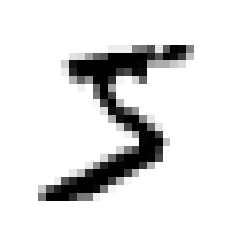

In [5]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

Cast `y` as an unsigned integer

In [6]:
y = y.astype(np.uint8)

Establish slices of `X` and `y`--one for training (the first `60000` data points) and the other for testing (the final `10000` data points); data is already shuffled, so randomization of indices is not necessary

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Simplify classification problem to just identify the digit `5`; classification task will simply return boolean true/false values (is `5`/isn't `5`)

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Import `SGDClassifier` and create an instance of it (this is a classification algorithm useful for handling large datasets); then call `fit` to train the model

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Call `predict` to test the model on a random digit `some_digit`

In [10]:
sgd_clf.predict([some_digit])

array([ True])

Begin defining performance measures, starting with an array of cross validation scores resulting from `3` splits of the data (per `cv`)

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Generate set of predictions to be used for the confusion matrix performance metrics

In [12]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Display confusion matrix based on prior predictions; based on the matrix `53892` images were correctly classified as "not 5" (true negative) and an additional `3530` were correctly identified as "5" (true positive); on the other hand `1891` images were incorrectly identified as "not 5" (false negative) and `687` images were incorrectly identified as "5" (false positive)

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

Display confusion matrix for assumed "perfect" model, where all results are true positives or negative

In [14]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

Determine precision score (high score indicates small number of false positives)

In [15]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

Determine recall score (high schore indicates small number of false negatives)

In [16]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

Determine F1 score (balance of recall and precision scores)

In [17]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846